In [44]:
#Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import pickle


In [45]:
# read the dataset

df = pd.read_csv('loan_approval_data.csv', index_col=False)
df.head(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


There are 3 different datatypes in the dataset which include float64(4), int64(1), object(8)

In [47]:
df.shape

(614, 13)

In [48]:
## Lets check the statistical summary of the data
df.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [49]:
# Check if there are any duplicate records in the dataset? If any, drop them.
def ifDuplicateSamples(data):
  dd = data.duplicated().sum()
  if dd == 0:
    print("There are no duplicate rows")
    return
  else:
    print("There are ",dd,"duplicate rows")

#running it on current data
ifDuplicateSamples(df)

There are no duplicate rows


In [50]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

<AxesSubplot:>

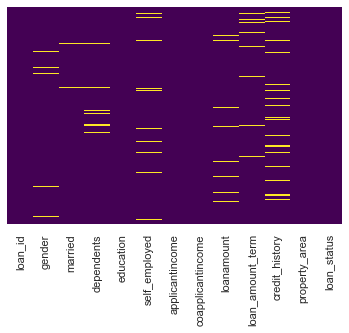

In [51]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* * * * from the visualization above we have missing values in gender,dependents,self-employed,loanAmount,loan-amount-term,credit-history

In [52]:
 df = df.fillna(df.mean().iloc[0])

C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_4440\2061033255.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean().iloc[0])


In [53]:
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

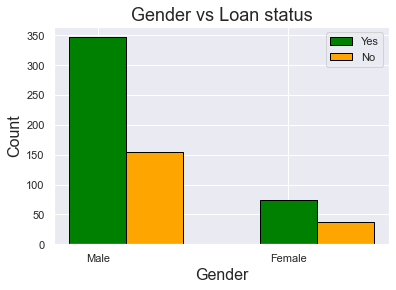

In [54]:
#Relationship between Gender and Loan Status:

Gender = ['Male', 'Female']
Loan_Status = ['Yes', 'No']
pos= np.arange(len(Gender))
bar_width= 0.30
Loan_Status_Yes= [347,75]
Loan_Status_NO= [155,37]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Gender)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Gender vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

From the chart above, we can conclude that male applicants have higher percentage of loan approval than female applicants and we move more male than female applying for loan

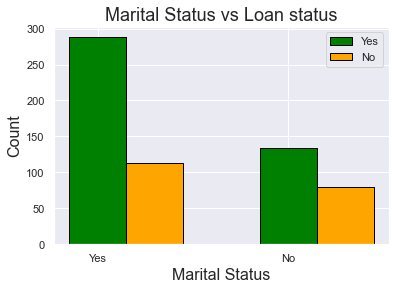

In [55]:
#Relationship between marital status vs loan status

MaritalStatus=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(MaritalStatus))
bar_width=0.30
Loan_Status_Yes=[288,134]
Loan_Status_NO=[113,79]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, MaritalStatus)
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Marital Status vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

From the chart above, we can conclude that the we have more married thand single customer approved for loan

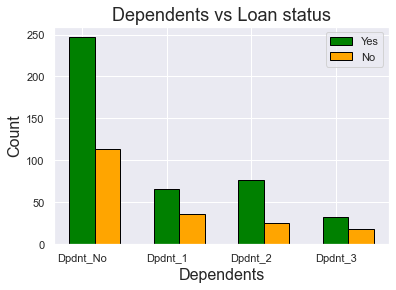

In [56]:
#Relationship between Dependents vs Loan status


Dependents=['Dpdnt_No', 'Dpdnt_1', 'Dpdnt_2', 'Dpdnt_3']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Dependents))
bar_width=0.30
Loan_Status_Yes=[247,66,76,33]
Loan_Status_NO=[113,36,25,18]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Dependents)
plt.xlabel('Dependents', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Dependents vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

From the chart, we can see that the number of dependents may automatically affect** the approvals of home loans. There is a higher chance of getting home loan approval for applicants who have less number of dependents or no dependents.

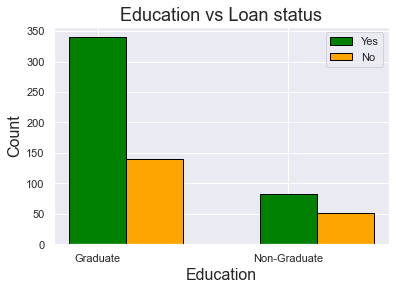

In [57]:
#Relationship between education vs Loan status:


Education=['Graduate', 'Non-Graduate']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Education))
bar_width=0.30
Loan_Status_Yes=[340,82]
Loan_Status_NO=[140,52]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Education)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Education vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

From the chart above, we can conclude** that the applicants who are graduate were in higher percentage of loan approval than non-graduate applicants.

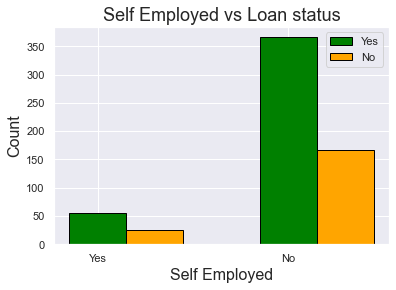

In [58]:
#Relationship between Self-Employed vs Loan_Status:

Self_Employed=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Self_Employed))
bar_width=0.30
Loan_Status_Yes=[56,366]
Loan_Status_NO=[26,166]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Self_Employed)
plt.xlabel('Self Employed', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Self Employed vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

From the chart above, we can see that non self employed applicant were more approved for loan that the self employed applicant

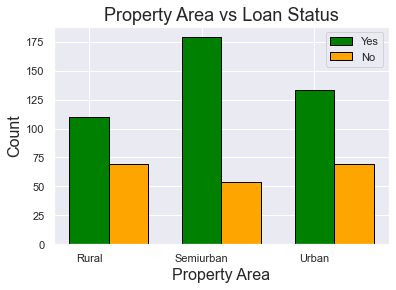

In [59]:
#Relationship between Property area and loan status

Property_Area=['Rural','Semiurban','Urban']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Property_Area))
bar_width=0.35
Loan_Status_Yes=[110,179,133]
Loan_Status_NO=[69,54,69]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Property_Area)
plt.xlabel('Property Area', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Property Area vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()


From the chart above results we can infer that, the higher percentage of loan approval is for semi-urban houses followed by urban and rural houses.

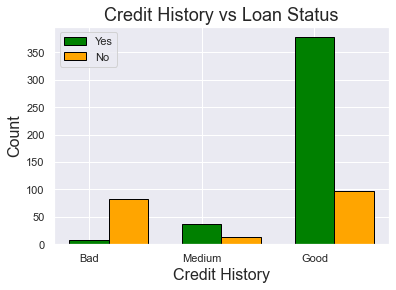

In [60]:
#Relationship between Credit History and Loan Status: 

Credit_History=['Bad','Medium','Good']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Credit_History))
bar_width=0.35
Loan_Status_Yes=[7,37,378]
Loan_Status_NO=[82,13,97]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Credit_History)
plt.xlabel('Credit History', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Credit History vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=2)
plt.show()

From the chart above results we can infer that, the higher percentage of loan approval is for customers with good credit history followed bycustomers with medium credit history and then the bad








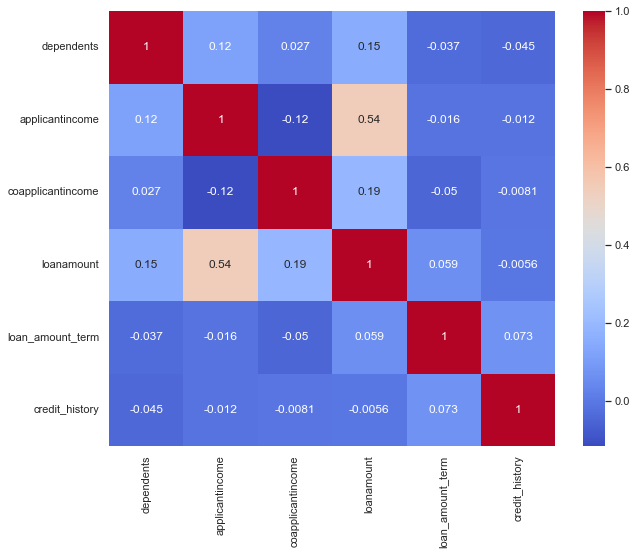

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [62]:
# print out column with unique values
for col in df.columns:
    if df[col].dtypes == 'object':
        num_of_unique_cat = len (df[col].unique())
        print("Features '{col_name}' has '{unique_cat}' unique categories". format(col_name=col, unique_cat=num_of_unique_cat))

Features 'loan_id' has '614' unique categories
Features 'gender' has '3' unique categories
Features 'married' has '3' unique categories
Features 'education' has '2' unique categories
Features 'self_employed' has '3' unique categories
Features 'property_area' has '3' unique categories
Features 'loan_status' has '2' unique categories


In [63]:
df.head(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,0.762938,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.000000,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.000000,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.000000,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.000000,360.0,1.0,urban,y


In [64]:
df = df.drop(['loan_id','dependents',], axis = 1)

In [67]:
df.head(5)

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1.0,0.0,1,0.0,5849,0.0,0.762938,360.0,1.0,2,1
1,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [68]:
df['self_employed'].replace({'yes':1,'no':0},inplace=True)
df['married'].replace({'yes':1,'no':0},inplace=True)
df['gender'].replace({'male':1,'female':0},inplace=True)
df['education'].replace({'graduate':1,'not graduate':0},inplace=True)
df['property_area'].replace({'urban':2,'semiurban':1,'rural':0},inplace=True)
df['loan_status'].replace({'y':1,'n':0},inplace=True)

In [81]:
df.head(5)

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1.0,0.0,1,0.0,5849,0.0,0.762938,360.0,1.0,2,1
1,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [84]:
y = df['loan_status'] #target
X = df.drop('loan_status', axis = 1) #features

In [85]:
X.head(5)

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,1.0,0.0,1,0.0,5849,0.0,0.762938,360.0,1.0,2
1,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0
2,1.0,1.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2
3,1.0,1.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2
4,1.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2


In [87]:
#Standardize the data - Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(491, 10) (123, 10)
(491,) (123,)


In [89]:
model = LogisticRegression(max_iter=1000) #define the model
model.fit(X_train.values, y_train) #fit the model
ypred = model.predict(X_test) #predict on test sample
evaluation = f1_score(y_test, ypred)
evaluation

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9015544041450777

In [90]:
pickle.dump(model,open('model.pkl','wb'))

In [91]:
model = pickle.load(open('model.pkl','rb'))
print(model)

LogisticRegression(max_iter=1000)


In [92]:
!pip install xgboost==1.3.1

In [93]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state = 0, max_depth=2, n_estimators=100, learning_rate = 0.05, min_child_weight= 3)
xgb_model.fit(X_train, y_train)

[14:56:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Feature Importances :  [0.         0.05312156 0.05377724 0.06197542 0.04273786 0.087189
 0.04635642 0.         0.58934355 0.06549896]


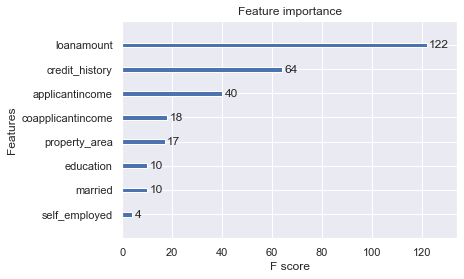

In [94]:
from xgboost import plot_importance

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [97]:
grid_search_1 = GridSearchCV(estimator = xgb_model, param_grid = param_grid, 
                         cv = 3, n_jobs = -1, verbose = 2)

In [98]:
grid_search_1.fit(X_train, y_train)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
[15:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.05, max_delta_step=0,
                                     max_depth=2, min_child_weight=3,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=2,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),

In [99]:
grid_search_1.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.3,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 7}

In [100]:
best_grid = grid_search_1.best_estimator_

In [101]:
xgb_model.save_model('xgb_model.json')

In [102]:
import pickle
pkl_file = "pkl_xgb_model.pkl"

pickle.dump(xgb_model, open(pkl_file, 'wb'))

In [103]:
y_pred = xgb_model.predict(X_test) #predict on test sample
evaluation = f1_score(y_test, y_pred)
evaluation

0.8934010152284264